# **FINDING HOW DATA DISTRIBUTED**

#### IMPORT REQUIRED LIBRARIES

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### LOAD THE DATASET

In [64]:
# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

In [65]:
# Set option for maximum columns view
pd.set_option("display.max_columns", None)

#### EXAMINE THE STRUCTURE OF DATA

In [66]:
print(df.columns)
print(df.shape)

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)
(65437, 114)


In [67]:
df.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


In [68]:
print(df.dtypes.to_string())

ResponseId                          int64
MainBranch                         object
Age                                object
Employment                         object
RemoteWork                         object
Check                              object
CodingActivities                   object
EdLevel                            object
LearnCode                          object
LearnCodeOnline                    object
TechDoc                            object
YearsCode                          object
YearsCodePro                       object
DevType                            object
OrgSize                            object
PurchaseInfluence                  object
BuyNewTool                         object
BuildvsBuy                         object
TechEndorse                        object
Country                            object
Currency                           object
CompTotal                         float64
LanguageHaveWorkedWith             object
LanguageWantToWorkWith            

---

#### HANDLE MISSING DATA

In [69]:
print(df.isna().sum().to_string())

ResponseId                            0
MainBranch                            0
Age                                   0
Employment                            0
RemoteWork                        10631
Check                                 0
CodingActivities                  10971
EdLevel                            4653
LearnCode                          4949
LearnCodeOnline                   16200
TechDoc                           24540
YearsCode                          5568
YearsCodePro                      13827
DevType                            5992
OrgSize                           17957
PurchaseInfluence                 18031
BuyNewTool                        20256
BuildvsBuy                        22079
TechEndorse                       21769
Country                            6507
Currency                          18753
CompTotal                         31697
LanguageHaveWorkedWith             5692
LanguageWantToWorkWith             9685
LanguageAdmired                   14565


In [70]:
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

In [71]:
# ---Handle Missing Values in RemoteWork---
print("RemoteWork Column Summary:\n")
print(f"Number of missing values: {df['RemoteWork'].isna().sum()}")
print(f"Data type: {df['RemoteWork'].dtypes}")
print(df['RemoteWork'].unique())

df['RemoteWork'] = df['RemoteWork'].fillna('Unknown')

# Verify
print(f"\nNumber of missing values after imputing: {df['RemoteWork'].isna().sum()}")

RemoteWork Column Summary:

Number of missing values: 10631
Data type: object
['Remote' nan 'In-person' 'Hybrid (some remote, some in-person)']

Number of missing values after imputing: 0


In [72]:
# ---Handle Missing Values in EdLevel---
print("EdLevel Column Summary:\n")
print(f"Number of missing values: {df['EdLevel'].isna().sum()}")
print(f"Data type: {df['EdLevel'].dtypes}")
print(df['EdLevel'].unique())

df['EdLevel'] = df['EdLevel'].fillna('Unknown')

# Verify
print(f"\nNumber of missing values after imputing: {df['EdLevel'].isna().sum()}")

EdLevel Column Summary:

Number of missing values: 4653
Data type: object
['Primary/elementary school'
 'Bachelor’s degree (B.A., B.S., B.Eng., etc.)'
 'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)'
 'Some college/university study without earning a degree'
 'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)'
 'Professional degree (JD, MD, Ph.D, Ed.D, etc.)'
 'Associate degree (A.A., A.S., etc.)' 'Something else' nan]

Number of missing values after imputing: 0


In [73]:
# ---Handle Missing Values in JobSat---
print("JobSat Column Summary:\n")
print(f"Number of missing values: {df['JobSat'].isna().sum()}")
print(f"Data type: {df['JobSat'].dtypes}")
print(df['JobSat'].unique())

df['JobSat'] = df['JobSat'].fillna(-1)

# Verify
print(f"\nNumber of missing values after imputing: {df['JobSat'].isna().sum()}")

JobSat Column Summary:

Number of missing values: 36311
Data type: float64
[nan  8.  5. 10.  6.  9.  4.  7.  3.  2.  1.  0.]

Number of missing values after imputing: 0


In [80]:
# ---Handle Missing Values in YearsCodePro---
print("YearsCodePro Column Summary:\n")
print(f"Number of missing values: {df['YearsCodePro'].isna().sum()}")
print(f"Data type: {df['YearsCodePro'].dtypes}")
print(df['YearsCodePro'].unique())

# Replace map for string value
replace_map = {
    'Less than 1 year' : 0,     # following the logic
    'More than 50 years': 51    
}

# Replace value according to replace_map
df['YearsCodePro'] = df['YearsCodePro'].replace(replace_map)

# Convert dtype to numeric
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# ---MASK for ACCURATE FILLING---
# People who are students/not employed AND represent NO form of employment
student_unemp= df['Employment'].str.contains("Student|Not employed", case=False, na=False)

# People who are Employed or Independent Contractor
is_worker = df['Employment'].str.contains("Employed|Independent contractor|Freelancer", case=False, na=False)

# Candidates for "0" experience:
# They are students group, but they are NOT in worker group
zero_experience = student_unemp & (~is_worker)

# ---FILL MISSING VALUES---
# Fill "0" experience candidates using filter
df.loc[zero_experience, 'YearsCodePro'] = df.loc[zero_experience, 'YearsCodePro'].fillna(0)

# Fill everyone else with median value
df['YearsCodePro'] = df['YearsCodePro'].fillna(df['YearsCodePro'].median())

# Verify
print(f"\nNumber of missing values after imputing: {df['YearsCodePro'].isna().sum()}")

YearsCodePro Column Summary:

Number of missing values: 13827
Data type: float64
[nan 17. 27.  7. 11. 25. 12. 10.  3.  0. 18. 37. 15. 20.  6.  2. 16.  8.
 14.  4. 45.  1. 24. 29.  5. 30. 26.  9. 33. 13. 35. 23. 22. 31. 19. 21.
 28. 34. 32. 40. 50. 39. 44. 42. 41. 36. 38. 51. 43. 47. 48. 46. 49.]

Number of missing values after imputing: 0


---

#### ANALYZE KEY COLUMNS

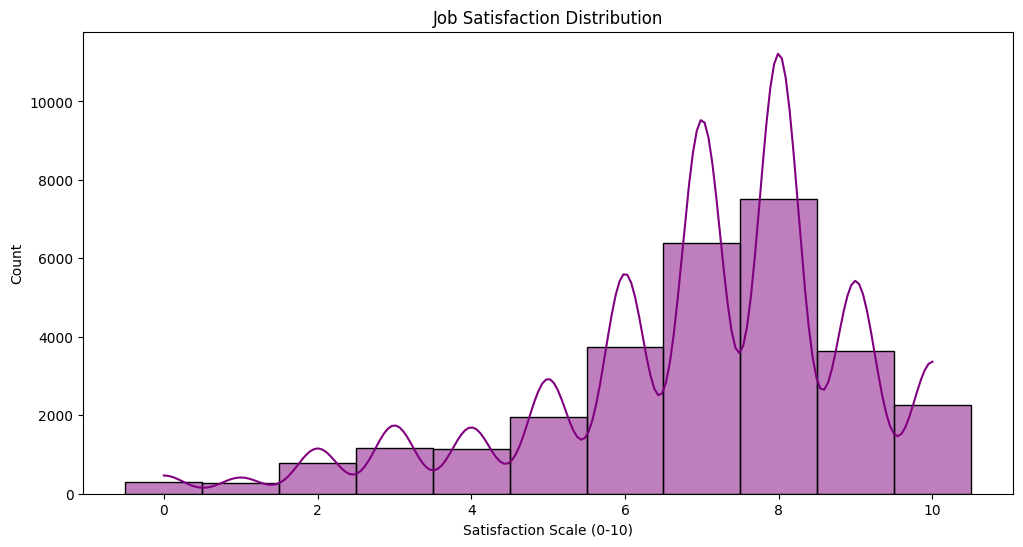

In [110]:
# JobSat distribution

# Filter out -1 (Unknown) values
applicable = df[df['JobSat'] >= 0]

plt.figure(figsize=(12,6))
sns.histplot(data=applicable, x='JobSat', discrete=True, kde=True, color='purple', legend=False)
plt.title("Job Satisfaction Distribution")
plt.xlabel("Satisfaction Scale (0-10)")
plt.ylabel('Count')

plt.show()

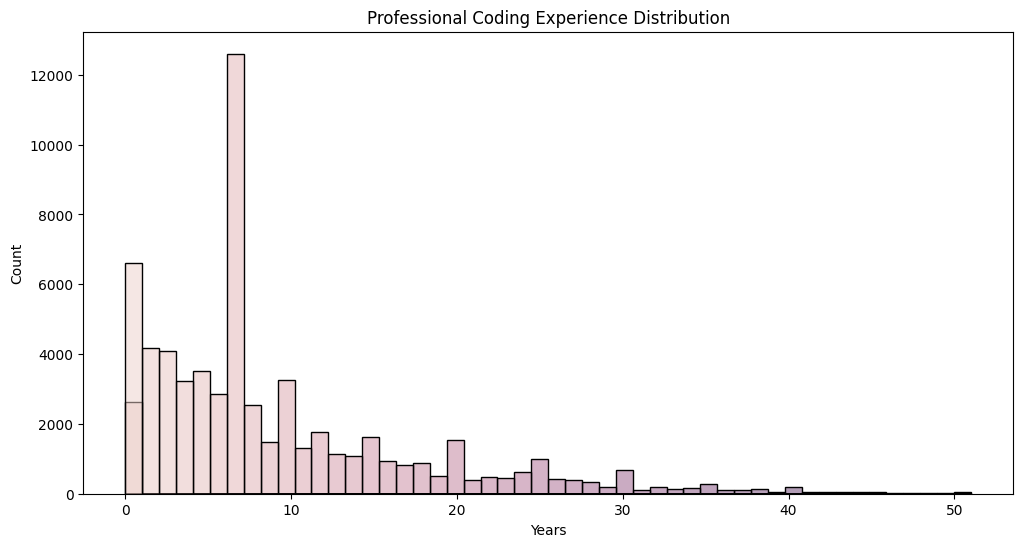

In [99]:
# Years Code Pro value counts
plt.figure(figsize=(12,6))

sns.histplot(data=df, x='YearsCodePro', bins=50, kde=True, hue='YearsCodePro', legend=False)
plt.title("Professional Coding Experience Distribution")
plt.xlabel('Years')
plt.ylabel('Count')

plt.show()

---